# Fertility Rate Prediction - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis (EDA) on the merged dataset to understand the relationships between various socioeconomic factors and fertility rates.

## Objectives:
1. Load and inspect the dataset
2. Analyze data quality and missing values
3. Explore feature distributions
4. Investigate correlations with fertility rate
5. Analyze temporal trends
6. Identify outliers and data quality issues
7. Generate insights for feature engineering and modeling

In [35]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure visualizations
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Inspection

In [36]:
# Load the cleaned dataset
df = pd.read_csv('../data/clean/final_merged_dataset_cleaned.csv')

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

Dataset loaded successfully!

Dataset shape: (13888, 15)
Rows: 13,888
Columns: 15


In [37]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Country Name,Country Code,Year,Female share of employment in senior and middle management (%),"Maternal mortality ratio (per 100,000 live births)","Labor force participation rate, female (%)",advanced_education_pct,basic_education_pct,Fertility rate,Urban population over total population,Capital GDP in USD,Access to electricity (% of population),WagedFemale,InfantMortality,LifeExpectancy
0,Afghanistan,AFG,1960.000,NaN,NaN,NaN,NaN,NaN,7.282,8.401,NaN,NaN,NaN,251.200,32.799
1,Afghanistan,AFG,1961.000,NaN,NaN,NaN,NaN,NaN,7.284,8.684,NaN,NaN,NaN,248.400,33.291
2,Afghanistan,AFG,1962.000,NaN,NaN,NaN,NaN,NaN,7.292,8.976,NaN,NaN,NaN,245.400,33.757
3,Afghanistan,AFG,1963.000,NaN,NaN,NaN,NaN,NaN,7.302,9.276,NaN,NaN,NaN,242.500,34.201
4,Afghanistan,AFG,1964.000,NaN,NaN,NaN,NaN,NaN,7.304,9.586,NaN,NaN,NaN,239.700,34.673
5,Afghanistan,AFG,1965.000,NaN,NaN,NaN,NaN,NaN,7.305,9.904,NaN,NaN,NaN,236.900,35.124
6,Afghanistan,AFG,1966.000,NaN,NaN,NaN,NaN,NaN,7.320,10.233,NaN,NaN,NaN,234.200,35.583
7,Afghanistan,AFG,1967.000,NaN,NaN,NaN,NaN,NaN,7.339,10.570,NaN,NaN,NaN,231.400,36.042
8,Afghanistan,AFG,1968.000,NaN,NaN,NaN,NaN,NaN,7.363,10.918,NaN,NaN,NaN,228.600,36.510
9,Afghanistan,AFG,1969.000,NaN,NaN,NaN,NaN,NaN,7.389,11.275,NaN,NaN,NaN,225.800,36.979


In [38]:
# Display column information
print("Dataset Information:")
print("=" * 80)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13888 entries, 0 to 13887
Data columns (total 15 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country Name                                                    13888 non-null  object 
 1   Country Code                                                    13888 non-null  object 
 2   Year                                                            13888 non-null  float64
 3   Female share of employment in senior and middle management (%)  1657 non-null   float64
 4   Maternal mortality ratio (per 100,000 live births)              7566 non-null   float64
 5   Labor force participation rate, female (%)                      4580 non-null   float64
 6   advanced_education_pct                                          2277 non-null   float64
 7   basic_education_pct         

In [39]:
# Display column names and clean them if needed
print("Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Column names:
 1. Country Name
 2. Country Code
 3. Year
 4. Female share of employment in senior and middle management (%)
 5. Maternal mortality ratio (per 100,000 live births)
 6. Labor force participation rate, female (%)
 7. advanced_education_pct
 8. basic_education_pct
 9. Fertility rate
10. Urban population over total population
11. Capital GDP in USD
12. Access to electricity (% of population)
13. WagedFemale
14. InfantMortality
15. LifeExpectancy


In [40]:
# Basic statistics
print("Basic Statistical Summary:")
print("=" * 80)
df.describe()

Basic Statistical Summary:


,Year,Female share of employment in senior and middle management (%),"Maternal mortality ratio (per 100,000 live births)","Labor force participation rate, female (%)",advanced_education_pct,basic_education_pct,Fertility rate,Urban population over total population,Capital GDP in USD,Access to electricity (% of population),WagedFemale,InfantMortality,LifeExpectancy
count,13888.000,1657.000,7566.000,4580.000,2277.000,2292.000,13856.000,13760.000,11366.000,6532.000,5738.000,10870.000,12949.000
mean,1991.500,30.670,231.693,65.039,74.169,37.011,3.810,51.795,9445.815,81.853,57.093,48.136,65.430
std,18.474,10.097,402.544,20.336,11.018,16.992,1.991,25.716,18655.094,28.990,31.722,44.843,11.115
min,1960.000,1.194,1.000,2.973,20.563,3.496,0.586,2.077,11.801,0.534,0.742,1.400,20.721
25%,1975.750,24.184,18.000,53.576,71.038,23.859,2.019,30.825,600.713,72.357,27.206,13.300,58.727
50%,1991.500,31.387,71.000,69.114,76.465,35.803,3.236,50.960,2131.123,99.400,63.545,32.450,68.176
75%,2007.250,37.369,290.000,80.902,80.840,46.508,5.681,72.657,9152.344,100.000,87.438,71.500,73.513
max,2023.000,74.193,8045.000,100.000,100.000,100.000,8.864,100.000,256580.515,100.000,99.895,251.200,86.372


In [41]:
# Check unique values for categorical columns
print("Unique Values:")
print("=" * 80)
print(f"Unique Countries: {df['Country Name'].nunique()}")
print(f"Unique Country Codes: {df['Country Code'].nunique()}")
print(f"Year Range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Total Years: {df['Year'].nunique()}")

Unique Values:
Unique Countries: 217
Unique Country Codes: 217
Year Range: 1960.0 - 2023.0
Total Years: 64


## 2. Missing Data Analysis

In [42]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2).values,
    'Data_Type': df.dtypes.values
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Data Summary:")
print("=" * 80)
print(missing_data)
print(f"\nTotal missing values: {df.isnull().sum().sum():,}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Missing Data Summary:
                                               Column  Missing_Count  \
3   Female share of employment in senior and middl...          12231   
6                              advanced_education_pct          11611   
7                                 basic_education_pct          11596   
5          Labor force participation rate, female (%)           9308   
12                                        WagedFemale           8150   
11            Access to electricity (% of population)           7356   
4   Maternal mortality ratio (per 100,000 live bir...           6322   
13                                    InfantMortality           3018   
10                                 Capital GDP in USD           2522   
14                                     LifeExpectancy            939   
9              Urban population over total population            128   
8                                      Fertility rate             32   
0                                        C

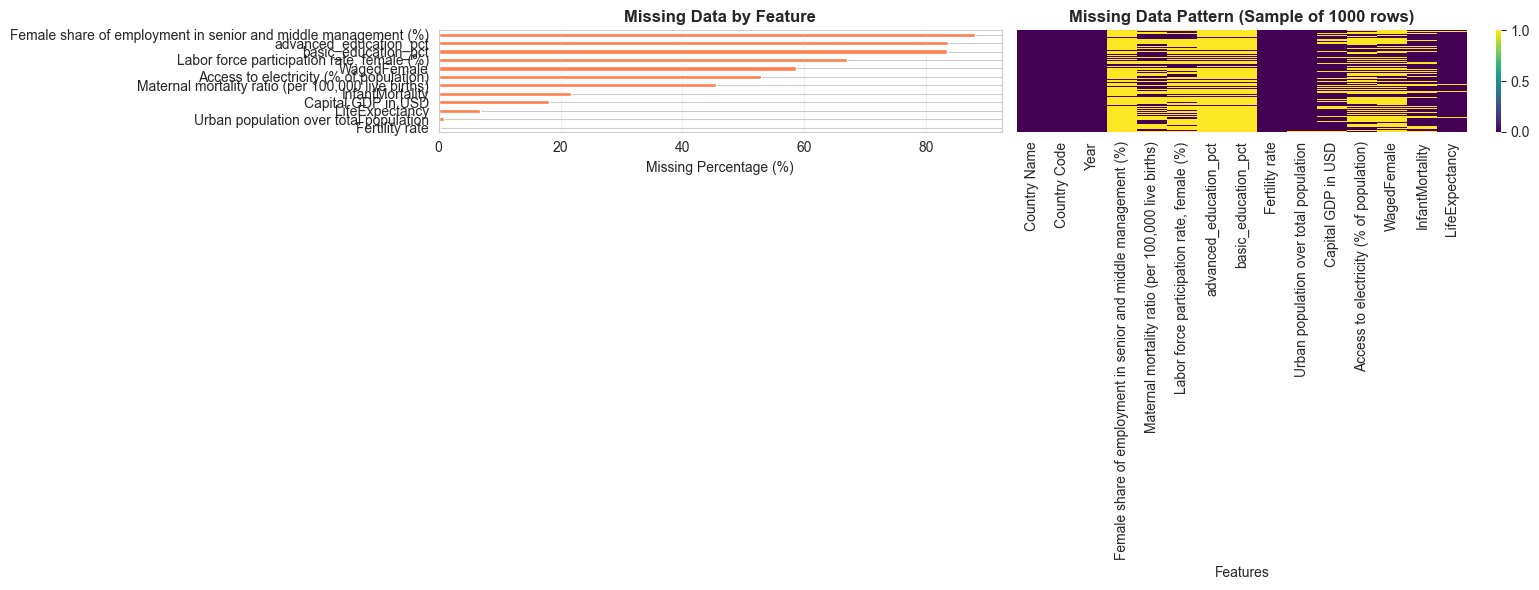

In [43]:
# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of missing percentages
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=True)
missing_pct[missing_pct > 0].plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_xlabel('Missing Percentage (%)')
axes[0].set_title('Missing Data by Feature', fontsize=12, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Heatmap showing missing data patterns
# Sample data if dataset is too large
sample_size = min(1000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)
sns.heatmap(df_sample.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[1])
axes[1].set_title(f'Missing Data Pattern (Sample of {sample_size} rows)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Features')

plt.tight_layout()
plt.show()

In [44]:
# Check completeness by country
country_completeness = df.groupby('Country Name').apply(
    lambda x: (x.notnull().sum().sum() / (len(x) * len(df.columns)) * 100)
).sort_values(ascending=False)

print("Top 10 Countries with Most Complete Data:")
print(country_completeness.head(10))
print("\nBottom 10 Countries with Least Complete Data:")
print(country_completeness.tail(10))

Top 10 Countries with Most Complete Data:
Country Name
Greece           79.271
Denmark          78.750
Spain            78.646
Italy            78.646
Portugal         78.438
Belgium          78.438
France           78.333
United Kingdom   78.333
Switzerland      78.229
Ireland          78.229
dtype: float64

Bottom 10 Countries with Least Complete Data:
Country Name
Northern Mariana Islands    46.250
Kosovo                      46.250
Micronesia, Fed. Sts.       45.938
Macao SAR, China            45.625
Yemen, Rep.                 45.417
Sint Maarten (Dutch part)   45.104
Gibraltar                   44.792
American Samoa              42.708
Korea, Dem. People's Rep.   38.958
St. Martin (French part)    37.292
dtype: float64


## 3. Target Variable Analysis - Fertility Rate

In [45]:
# Focus on fertility rate (target variable)
target_col = 'Fertility rate'

print(f"Fertility Rate Statistics:")
print("=" * 80)
print(df[target_col].describe())
print(f"\nMissing values: {df[target_col].isnull().sum()} ({df[target_col].isnull().sum() / len(df) * 100:.2f}%)")
print(f"Available values: {df[target_col].notna().sum()} ({df[target_col].notna().sum() / len(df) * 100:.2f}%)")

Fertility Rate Statistics:
count   13856.000
mean        3.810
std         1.991
min         0.586
25%         2.019
50%         3.236
75%         5.681
max         8.864
Name: Fertility rate, dtype: float64

Missing values: 32 (0.23%)
Available values: 13856 (99.77%)


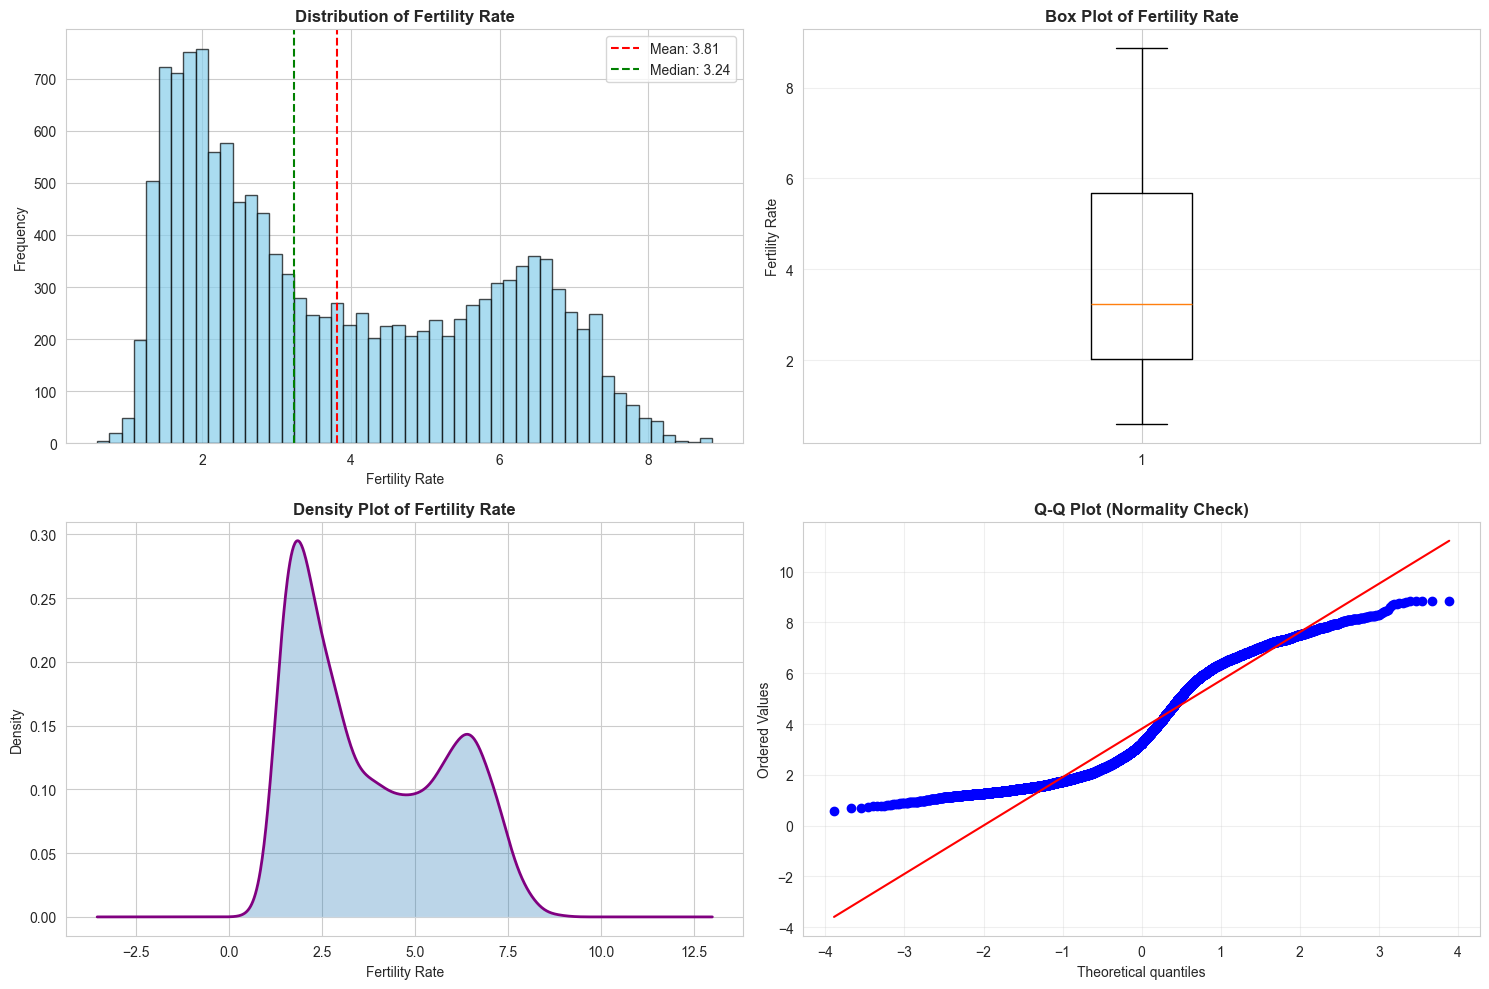

In [46]:
# Visualize fertility rate distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df[target_col].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Fertility Rate')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Fertility Rate', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df[target_col].mean(), color='red', linestyle='--', label=f'Mean: {df[target_col].mean():.2f}')
axes[0, 0].axvline(df[target_col].median(), color='green', linestyle='--', label=f'Median: {df[target_col].median():.2f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df[target_col].dropna(), vert=True)
axes[0, 1].set_ylabel('Fertility Rate')
axes[0, 1].set_title('Box Plot of Fertility Rate', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# KDE plot
df[target_col].dropna().plot(kind='kde', ax=axes[1, 0], color='purple', linewidth=2)
axes[1, 0].set_xlabel('Fertility Rate')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Density Plot of Fertility Rate', fontsize=12, fontweight='bold')
axes[1, 0].fill_between(axes[1, 0].lines[0].get_xdata(), axes[1, 0].lines[0].get_ydata(), alpha=0.3)

# Q-Q plot for normality check
from scipy import stats
stats.probplot(df[target_col].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Temporal Analysis - Trends Over Time

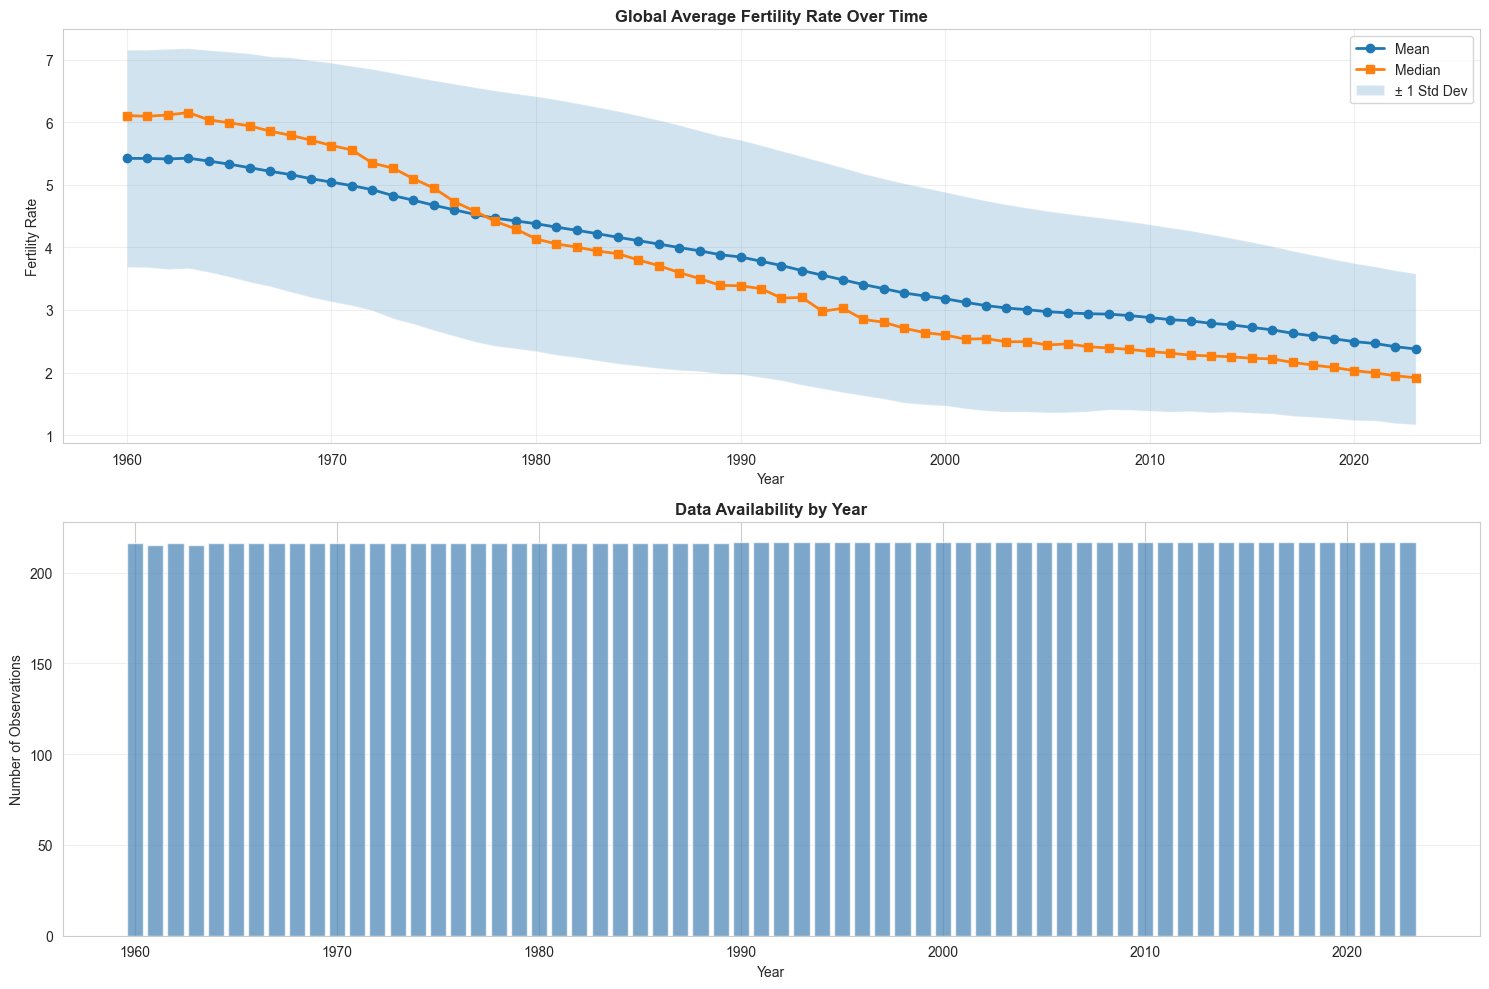

In [47]:
# Average fertility rate by year
fertility_by_year = df.groupby('Year')[target_col].agg(['mean', 'median', 'std', 'count'])

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Mean and median over time
axes[0].plot(fertility_by_year.index, fertility_by_year['mean'], marker='o', label='Mean', linewidth=2)
axes[0].plot(fertility_by_year.index, fertility_by_year['median'], marker='s', label='Median', linewidth=2)
axes[0].fill_between(fertility_by_year.index, 
                      fertility_by_year['mean'] - fertility_by_year['std'],
                      fertility_by_year['mean'] + fertility_by_year['std'],
                      alpha=0.2, label='± 1 Std Dev')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Fertility Rate')
axes[0].set_title('Global Average Fertility Rate Over Time', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Data availability over time
axes[1].bar(fertility_by_year.index, fertility_by_year['count'], color='steelblue', alpha=0.7)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Observations')
axes[1].set_title('Data Availability by Year', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

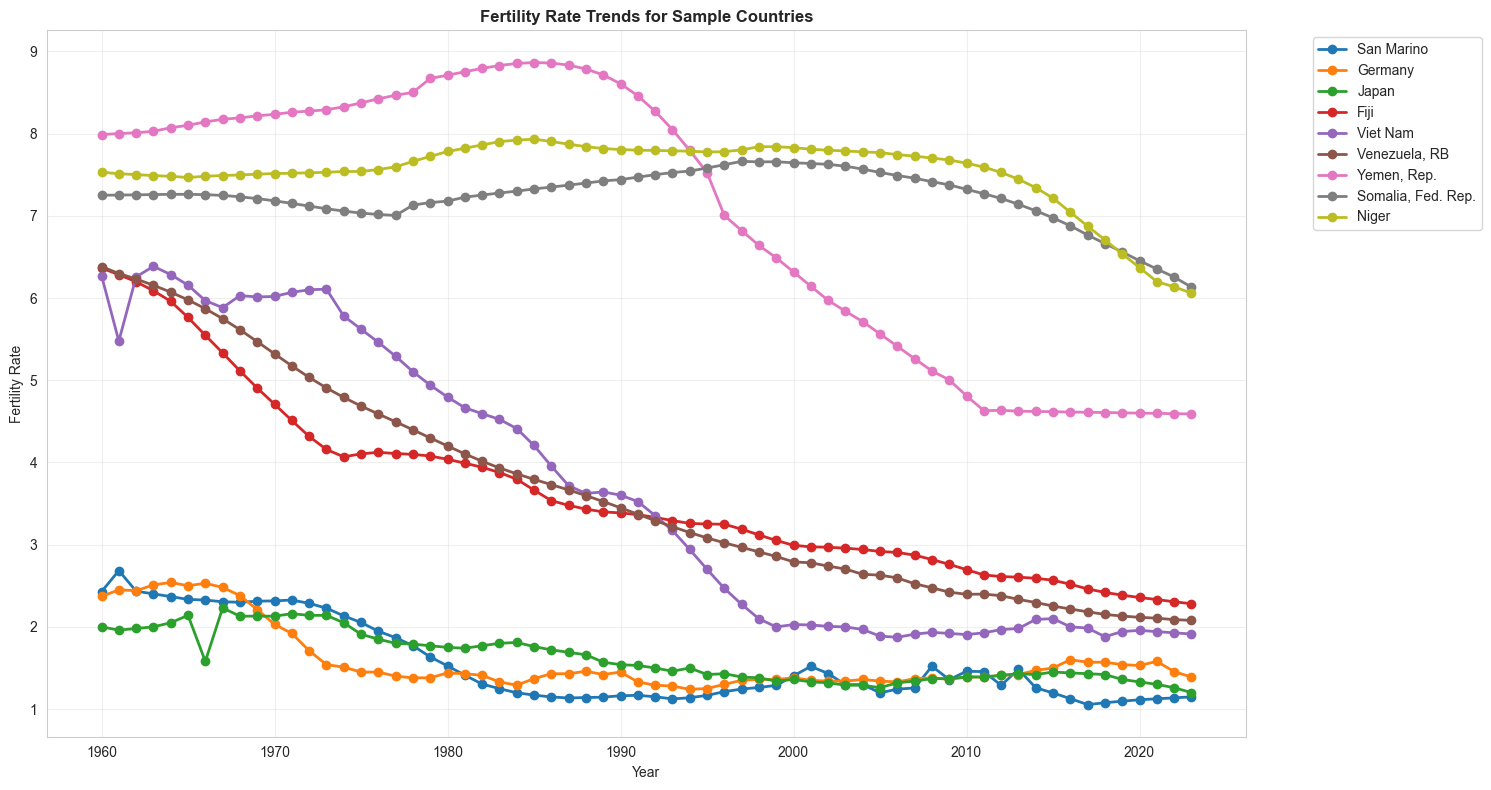

In [48]:
# Sample countries to visualize individual trends
# Select diverse countries
sample_countries = df.groupby('Country Name')[target_col].mean().dropna().sort_values()
low_fertility = sample_countries.head(3).index.tolist()
mid_fertility = sample_countries[len(sample_countries)//2-1:len(sample_countries)//2+2].index.tolist()
high_fertility = sample_countries.tail(3).index.tolist()
sample_countries_list = low_fertility + mid_fertility + high_fertility

plt.figure(figsize=(15, 8))
for country in sample_countries_list:
    country_data = df[df['Country Name'] == country].sort_values('Year')
    plt.plot(country_data['Year'], country_data[target_col], marker='o', label=country, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate Trends for Sample Countries', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Feature Distribution Analysis

In [49]:
# Select numeric columns (excluding identifiers)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove Year from analysis
numeric_cols = [col for col in numeric_cols if col != 'Year']

print(f"Numeric features to analyze: {len(numeric_cols)}")
print(numeric_cols)

Numeric features to analyze: 12
['Female share of employment in senior and middle management (%)', 'Maternal mortality ratio (per 100,000 live births)', 'Labor force participation rate, female (%)', 'advanced_education_pct', 'basic_education_pct', 'Fertility rate', 'Urban population over total population', 'Capital GDP in USD', 'Access to electricity (% of population)', 'WagedFemale', 'InfantMortality', 'LifeExpectancy']


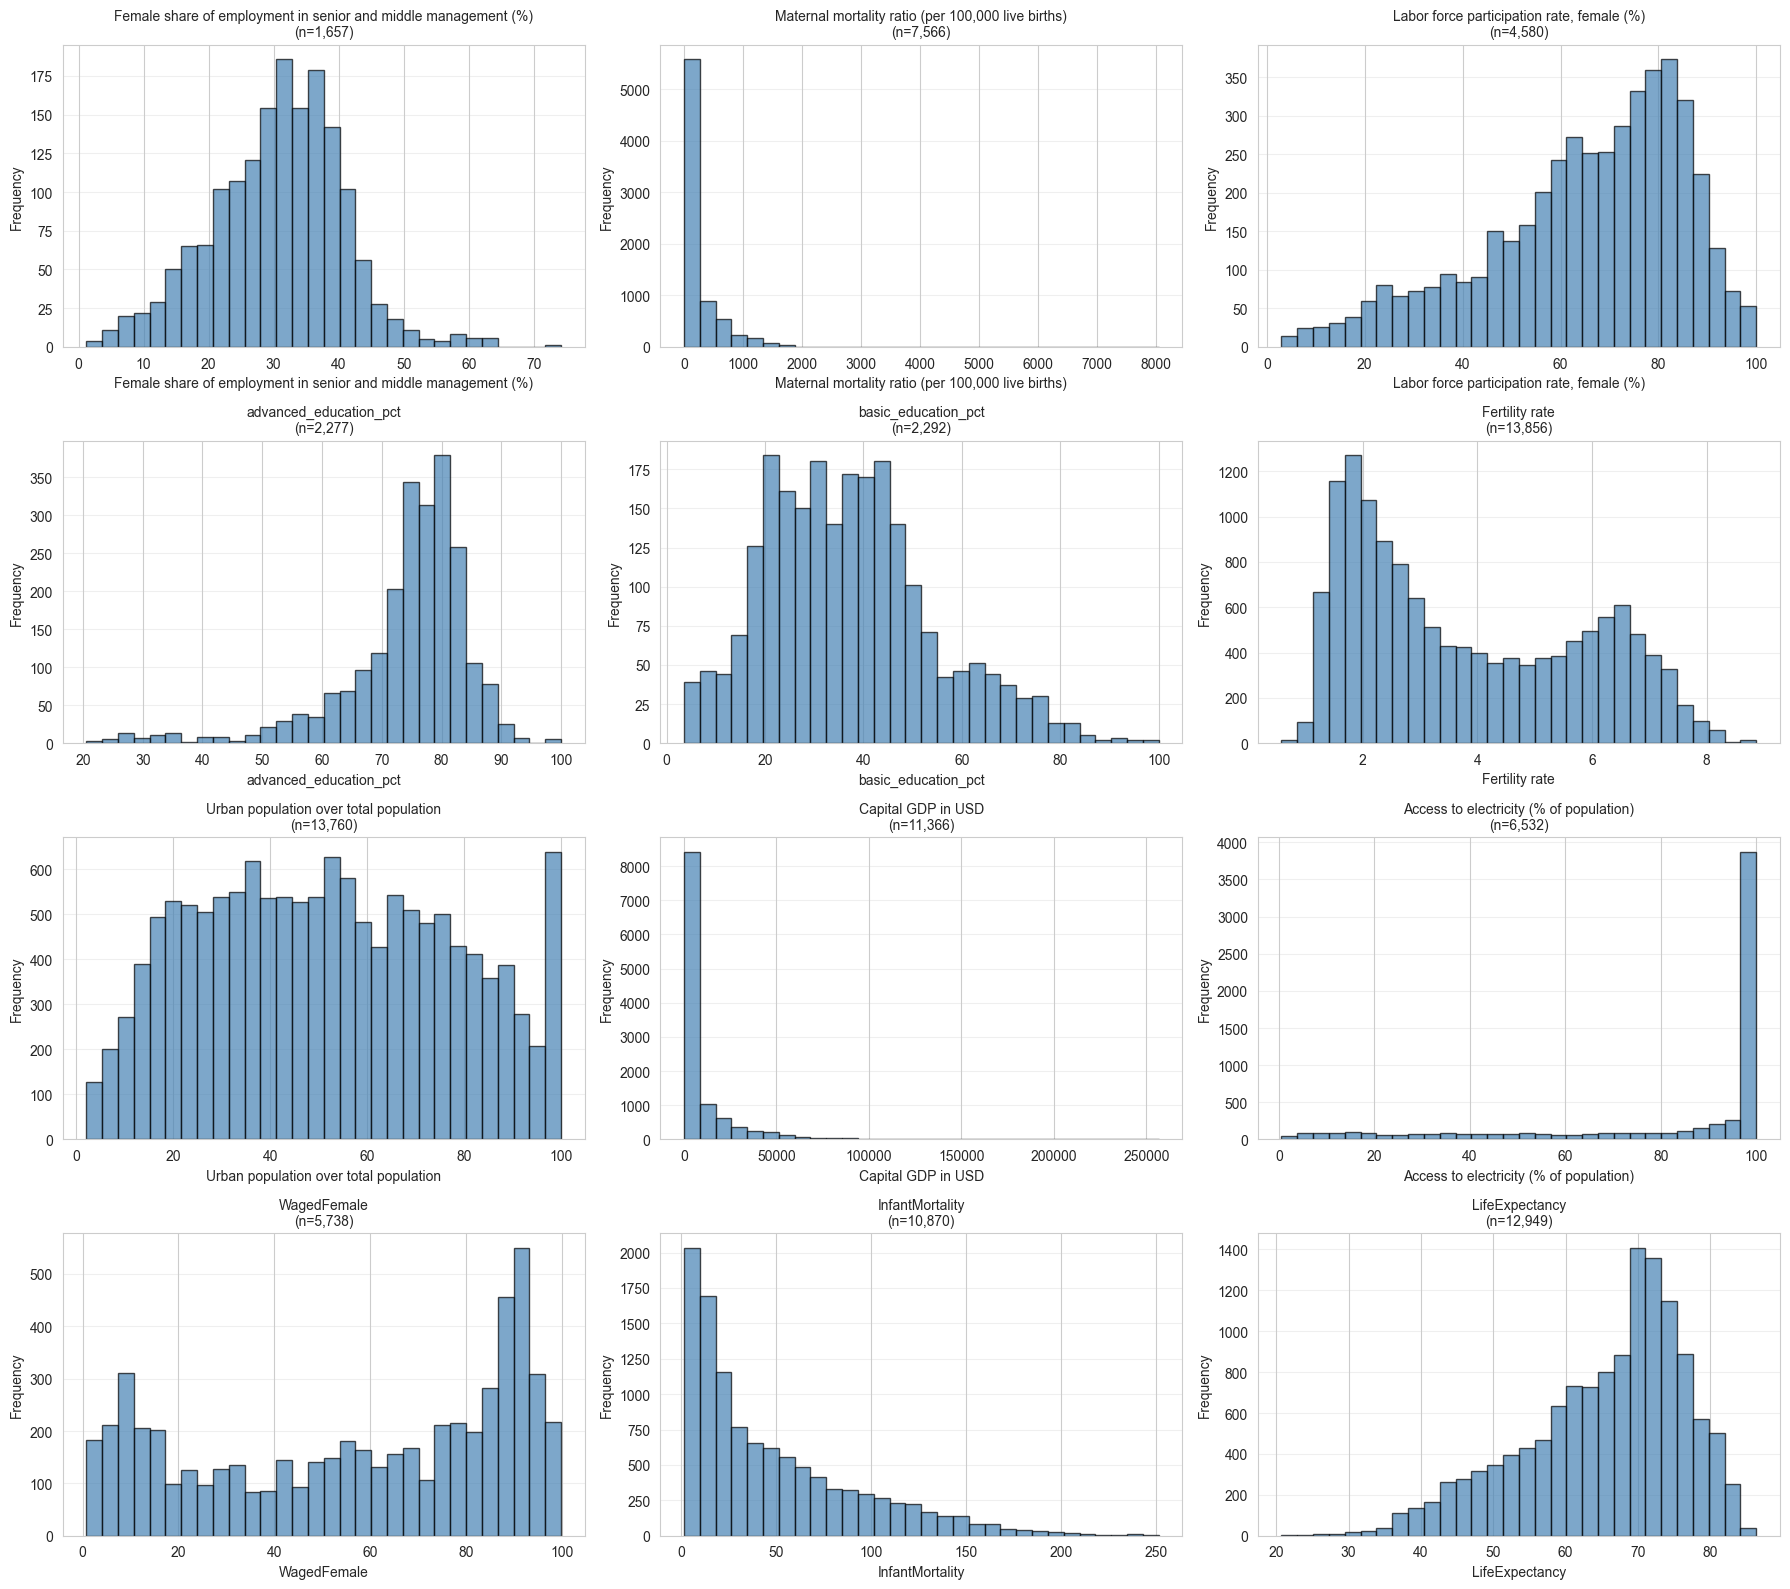

In [50]:
# Distribution plots for all numeric features
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        data = df[col].dropna()
        if len(data) > 0:
            axes[idx].hist(data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'{col}\n(n={len(data):,})', fontsize=10)
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(axis='y', alpha=0.3)
        else:
            axes[idx].text(0.5, 0.5, 'No data available', ha='center', va='center')
            axes[idx].set_title(col)

# Hide extra subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [51]:
# Statistical summary for all numeric features
print("Statistical Summary of All Numeric Features:")
print("=" * 80)
df[numeric_cols].describe().T

Statistical Summary of All Numeric Features:


,count,mean,std,min,25%,50%,75%,max
Female share of employment in senior and middle management (%),1657.000,30.670,10.097,1.194,24.184,31.387,37.369,74.193
"Maternal mortality ratio (per 100,000 live births)",7566.000,231.693,402.544,1.000,18.000,71.000,290.000,8045.000
"Labor force participation rate, female (%)",4580.000,65.039,20.336,2.973,53.576,69.114,80.902,100.000
advanced_education_pct,2277.000,74.169,11.018,20.563,71.038,76.465,80.840,100.000
basic_education_pct,2292.000,37.011,16.992,3.496,23.859,35.803,46.508,100.000
Fertility rate,13856.000,3.810,1.991,0.586,2.019,3.236,5.681,8.864
Urban population over total population,13760.000,51.795,25.716,2.077,30.825,50.960,72.657,100.000
Capital GDP in USD,11366.000,9445.815,18655.094,11.801,600.713,2131.123,9152.344,256580.515
Access to electricity (% of population),6532.000,81.853,28.990,0.534,72.357,99.400,100.000,100.000
WagedFemale,5738.000,57.093,31.722,0.742,27.206,63.545,87.438,99.895


## 6. Correlation Analysis

In [52]:
# Calculate correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Correlation with fertility rate
if target_col in correlation_matrix.columns:
    fertility_corr = correlation_matrix[target_col].sort_values(ascending=False)
    print("Correlation with Fertility Rate:")
    print("=" * 80)
    print(fertility_corr)
    print(f"\nStrongest positive correlations:")
    print(fertility_corr[fertility_corr > 0].drop(target_col).head(5))
    print(f"\nStrongest negative correlations:")
    print(fertility_corr[fertility_corr < 0].head(5))

Correlation with Fertility Rate:
Fertility rate                                                    1.000
InfantMortality                                                   0.832
Maternal mortality ratio (per 100,000 live births)                0.688
basic_education_pct                                               0.243
Female share of employment in senior and middle management (%)   -0.134
advanced_education_pct                                           -0.259
Capital GDP in USD                                               -0.435
Labor force participation rate, female (%)                       -0.436
Urban population over total population                           -0.613
WagedFemale                                                      -0.760
Access to electricity (% of population)                          -0.829
LifeExpectancy                                                   -0.849
Name: Fertility rate, dtype: float64

Strongest positive correlations:
InfantMortality                 

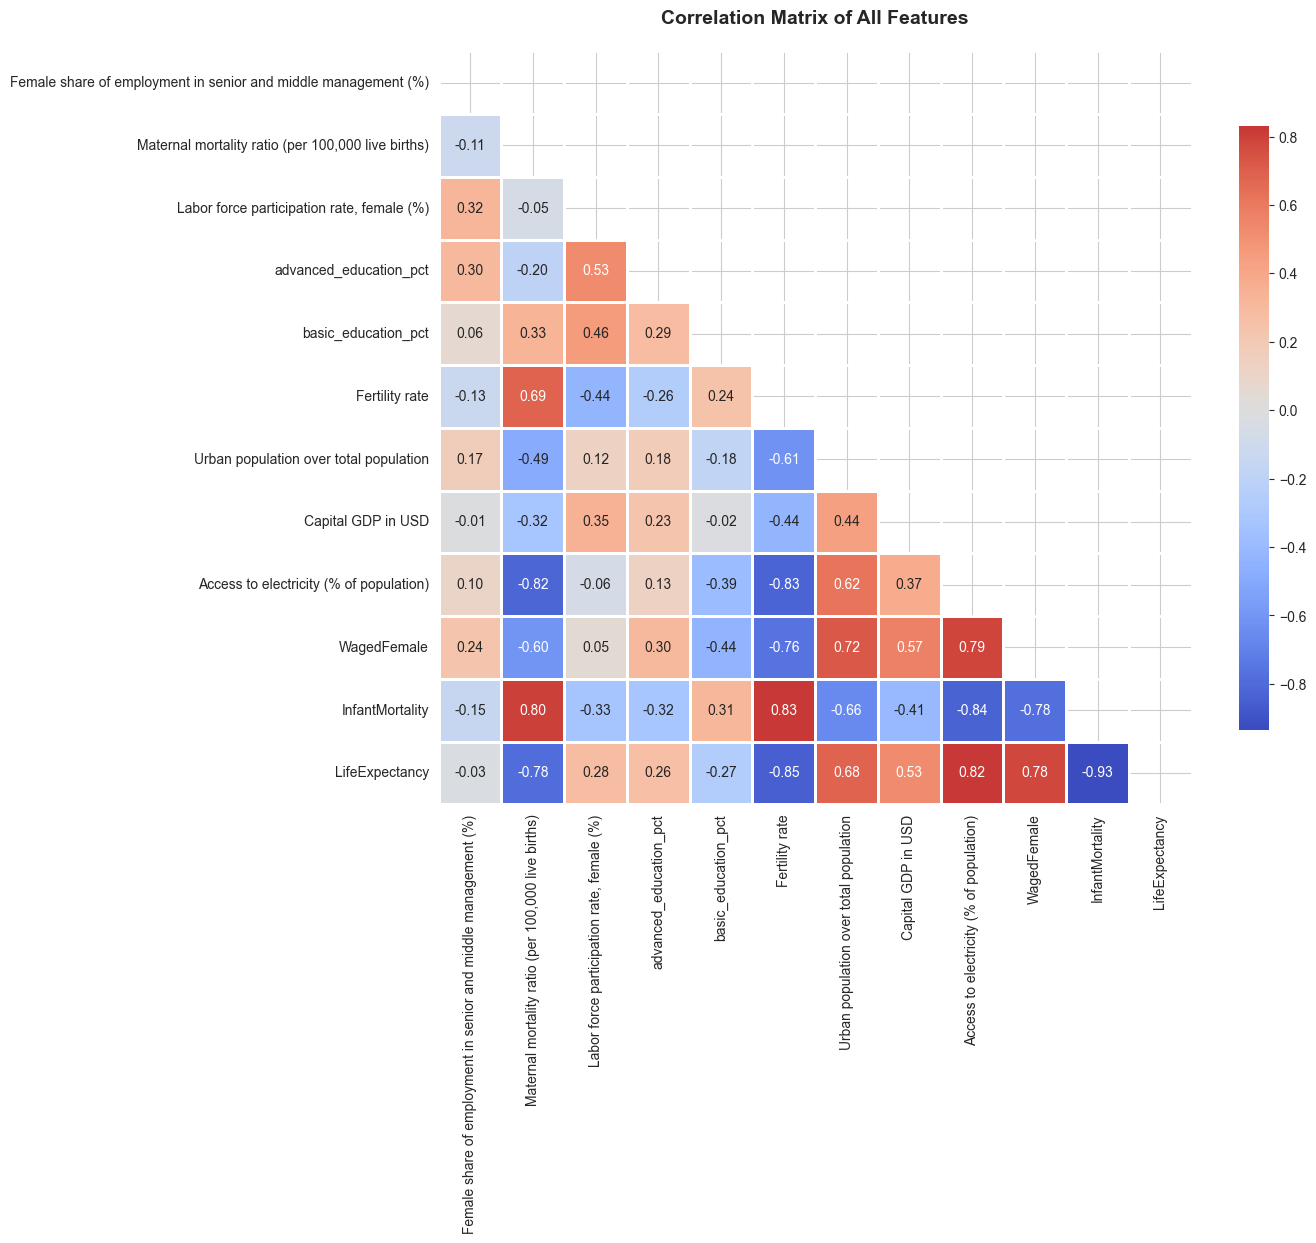

In [53]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

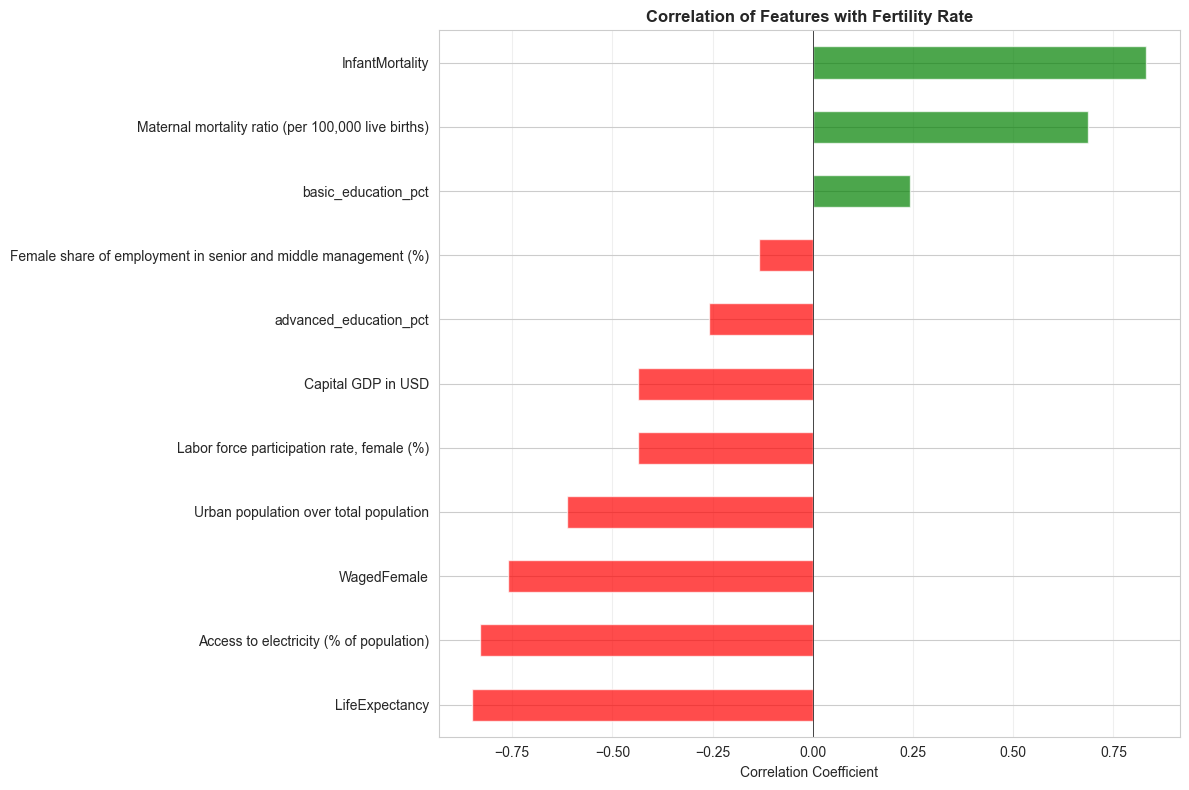

In [54]:
# Bar plot of correlations with fertility rate
if target_col in correlation_matrix.columns:
    fertility_corr_plot = fertility_corr.drop(target_col).sort_values()
    
    plt.figure(figsize=(12, 8))
    colors = ['red' if x < 0 else 'green' for x in fertility_corr_plot.values]
    fertility_corr_plot.plot(kind='barh', color=colors, alpha=0.7)
    plt.xlabel('Correlation Coefficient')
    plt.title('Correlation of Features with Fertility Rate', fontsize=12, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

## 7. Scatter Plots - Relationships with Fertility Rate

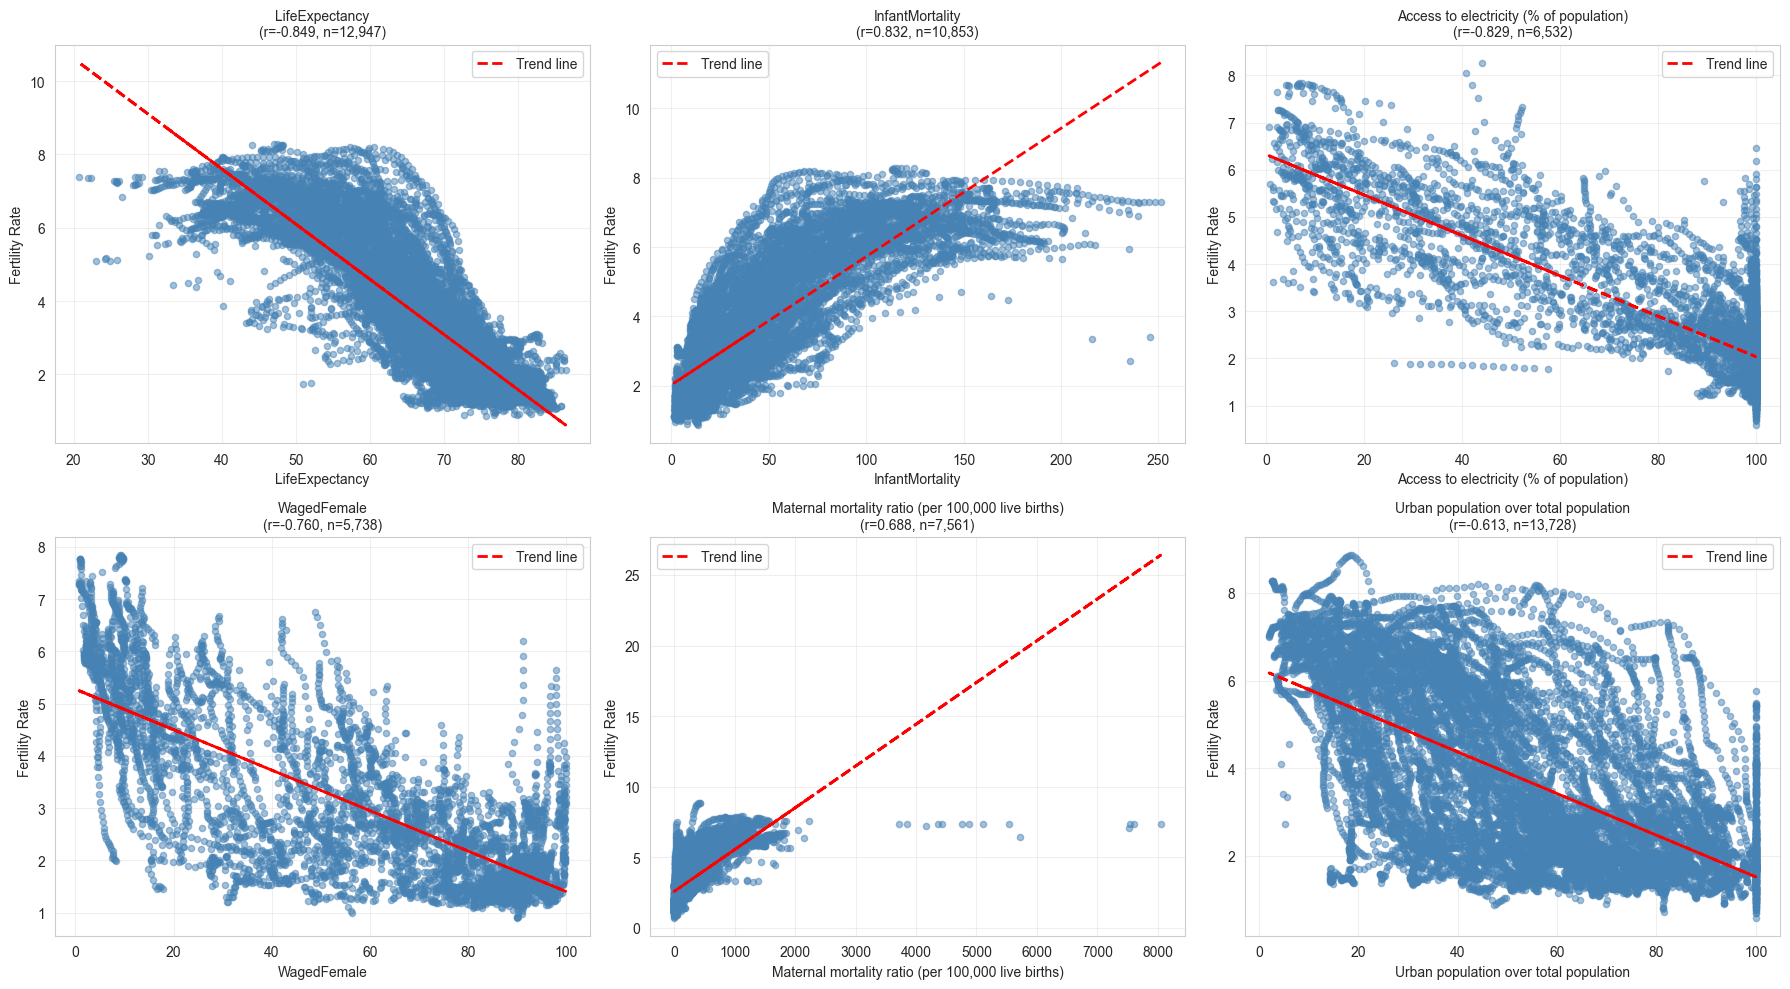

In [55]:
# Top correlated features for scatter plots
if target_col in correlation_matrix.columns:
    top_features = fertility_corr.drop(target_col).abs().sort_values(ascending=False).head(6).index.tolist()
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for idx, feature in enumerate(top_features):
        if idx < len(axes):
            # Filter out missing values
            plot_data = df[[feature, target_col]].dropna()
            
            axes[idx].scatter(plot_data[feature], plot_data[target_col], 
                            alpha=0.5, s=20, color='steelblue')
            
            # Add trend line
            if len(plot_data) > 0:
                z = np.polyfit(plot_data[feature], plot_data[target_col], 1)
                p = np.poly1d(z)
                axes[idx].plot(plot_data[feature], p(plot_data[feature]), 
                             "r--", linewidth=2, label=f'Trend line')
            
            corr_val = correlation_matrix.loc[feature, target_col]
            axes[idx].set_xlabel(feature)
            axes[idx].set_ylabel('Fertility Rate')
            axes[idx].set_title(f'{feature}\n(r={corr_val:.3f}, n={len(plot_data):,})', fontsize=10)
            axes[idx].grid(alpha=0.3)
            axes[idx].legend()
    
    plt.tight_layout()
    plt.show()

## 8. Outlier Detection

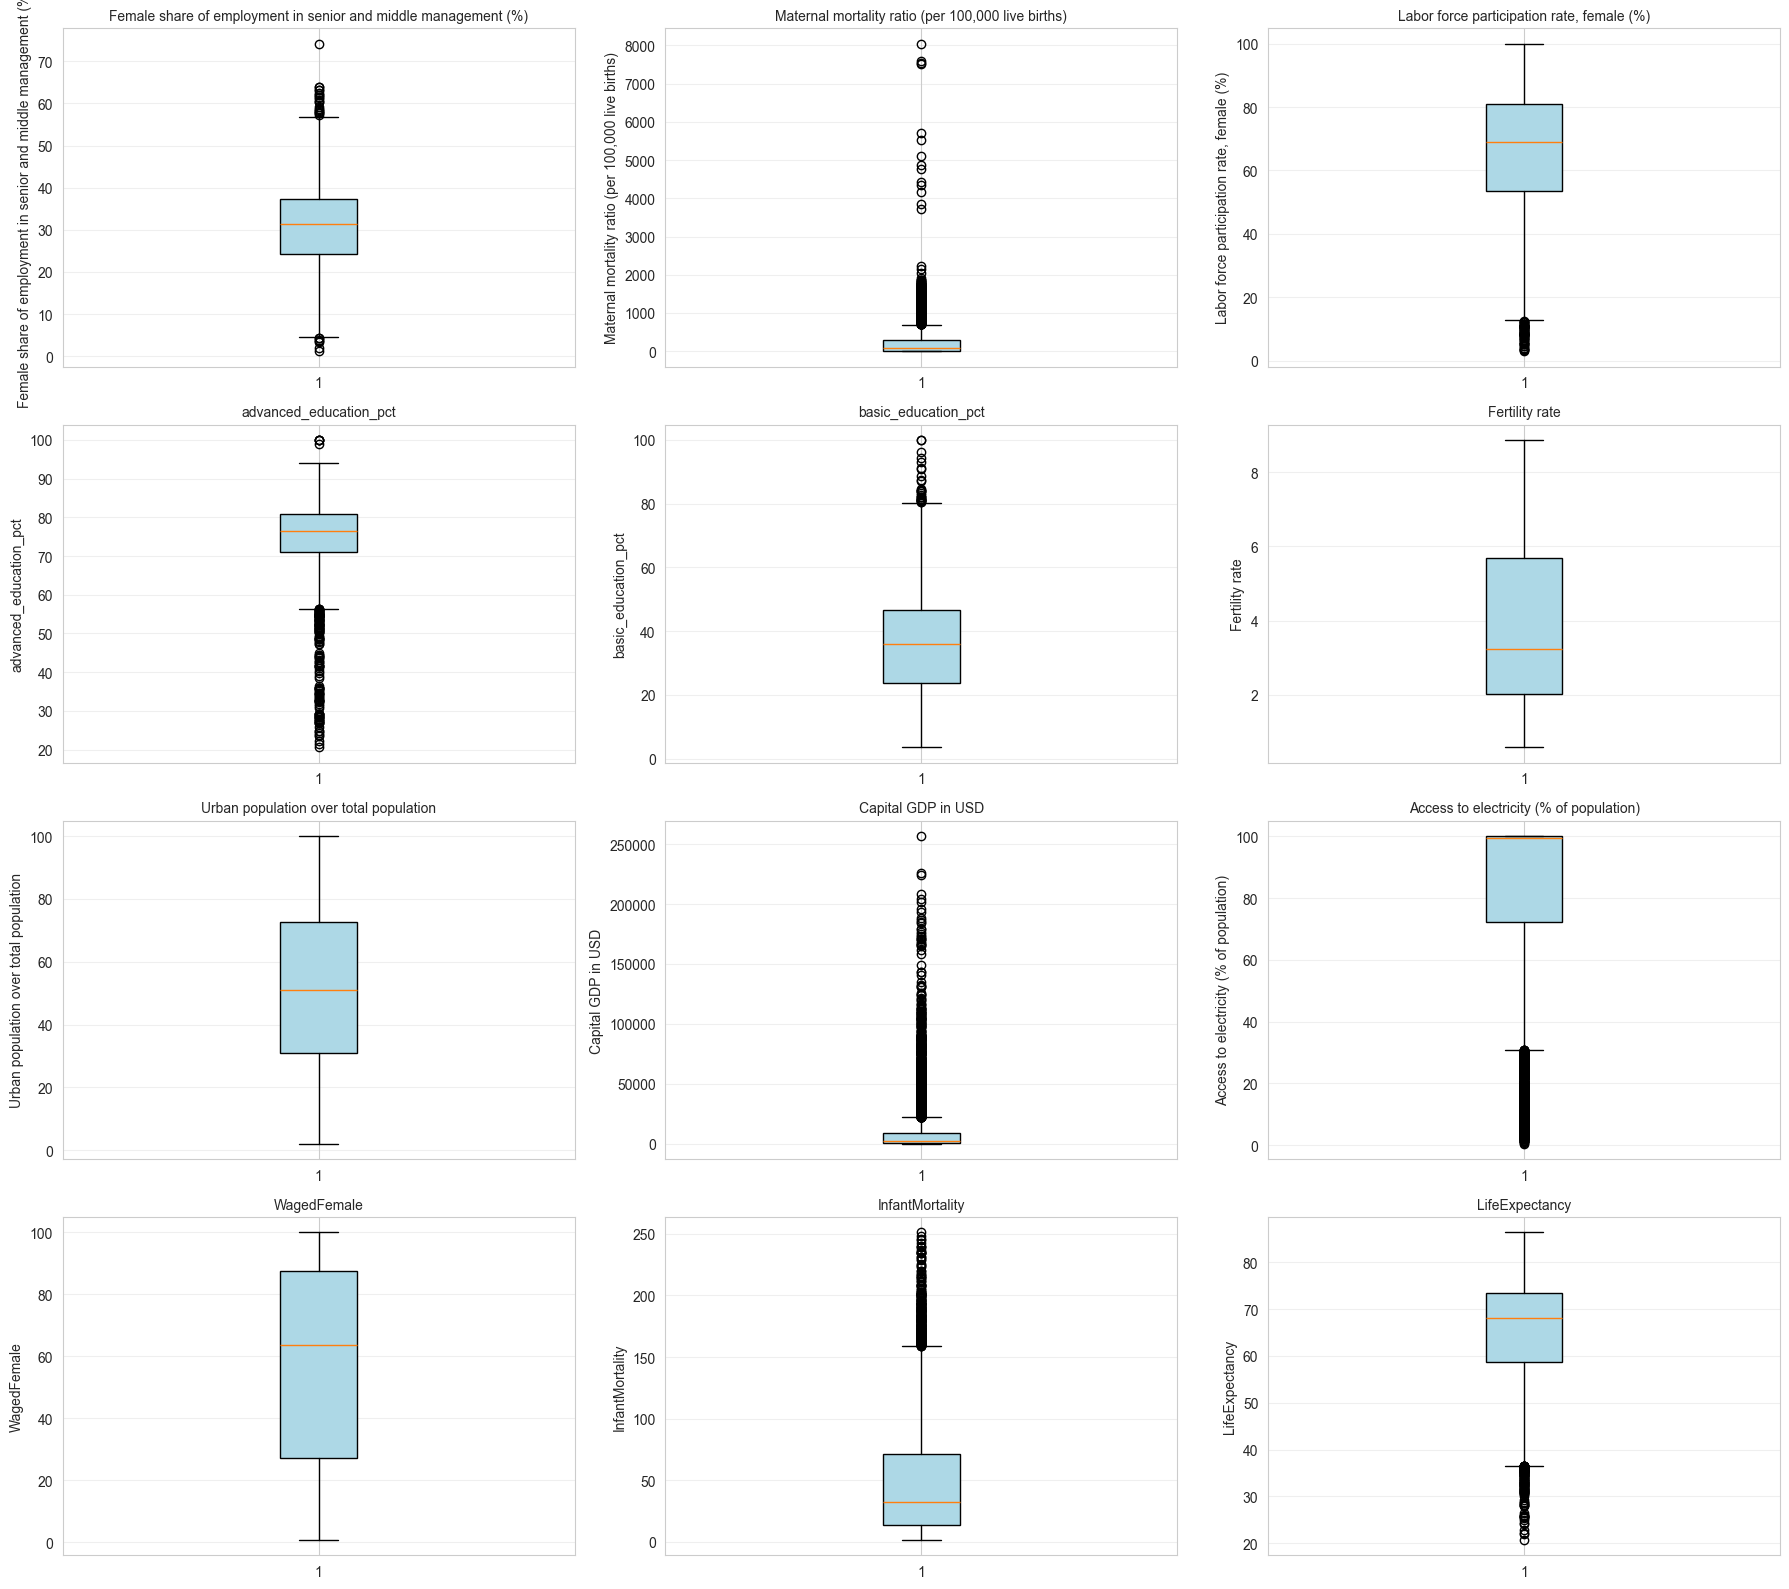

In [56]:
# Box plots for outlier detection
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        data = df[col].dropna()
        if len(data) > 0:
            bp = axes[idx].boxplot(data, vert=True, patch_artist=True)
            for patch in bp['boxes']:
                patch.set_facecolor('lightblue')
            axes[idx].set_ylabel(col)
            axes[idx].set_title(f'{col}', fontsize=10)
            axes[idx].grid(axis='y', alpha=0.3)
        else:
            axes[idx].text(0.5, 0.5, 'No data', ha='center', va='center')
            axes[idx].set_title(col)

# Hide extra subplots
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [57]:
# Identify outliers using IQR method for fertility rate
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]

print(f"Fertility Rate Outlier Detection (IQR Method):")
print("=" * 80)
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"\nNumber of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
print(f"\nSample outliers:")
outliers[['Country Name', 'Year', target_col]].sort_values(target_col, ascending=False).head(10)

Fertility Rate Outlier Detection (IQR Method):
Q1 (25th percentile): 2.02
Q3 (75th percentile): 5.68
IQR: 3.66
Lower bound: -3.47
Upper bound: 11.17

Number of outliers: 0 (0.00%)

Sample outliers:


,Country Name,Year,Fertility rate


## 9. Feature Availability Analysis

In [58]:
# Check which rows have the target variable and other features
df_with_target = df[df[target_col].notna()].copy()

print(f"Rows with Fertility Rate data: {len(df_with_target)} ({len(df_with_target)/len(df)*100:.2f}%)")
print(f"\nFeature availability for rows with Fertility Rate:")
print("=" * 80)

feature_availability = pd.DataFrame({
    'Feature': df_with_target.columns,
    'Available': df_with_target.notna().sum().values,
    'Available_Pct': (df_with_target.notna().sum() / len(df_with_target) * 100).round(2).values
}).sort_values('Available_Pct', ascending=False)

feature_availability

Rows with Fertility Rate data: 13856 (99.77%)

Feature availability for rows with Fertility Rate:


,Feature,Available,Available_Pct
0,Country Name,13856,100.000
1,Country Code,13856,100.000
2,Year,13856,100.000
8,Fertility rate,13856,100.000
9,Urban population over total population,13728,99.080
14,LifeExpectancy,12947,93.440
10,Capital GDP in USD,11364,82.020
13,InfantMortality,10853,78.330
4,"Maternal mortality ratio (per 100,000 live bir...",7561,54.570
11,Access to electricity (% of population),6532,47.140


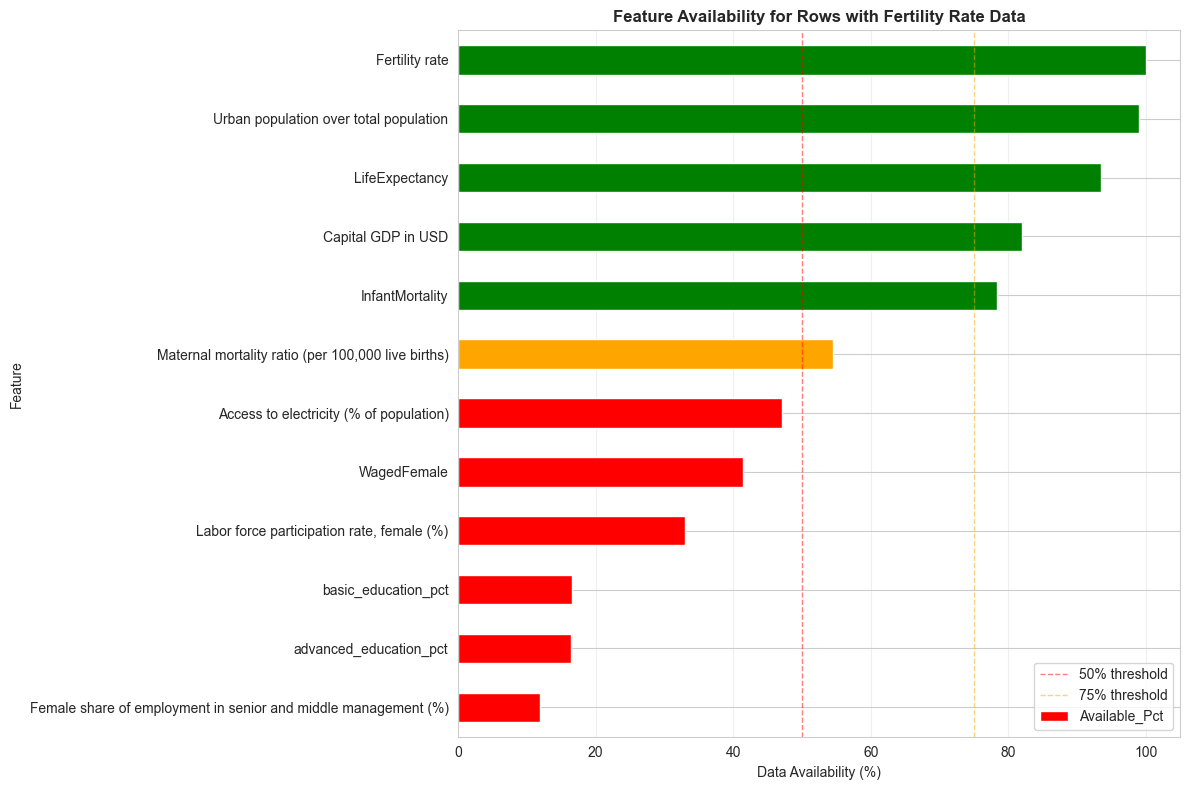

In [59]:
# Visualize feature availability for modeling
plt.figure(figsize=(12, 8))
feature_avail_plot = feature_availability[feature_availability['Feature'].isin(numeric_cols)].sort_values('Available_Pct')
colors = ['red' if x < 50 else 'orange' if x < 75 else 'green' for x in feature_avail_plot['Available_Pct']]
feature_avail_plot.plot(x='Feature', y='Available_Pct', kind='barh', color=colors, ax=plt.gca(), legend=False)
plt.xlabel('Data Availability (%)')
plt.ylabel('Feature')
plt.title('Feature Availability for Rows with Fertility Rate Data', fontsize=12, fontweight='bold')
plt.axvline(x=50, color='red', linestyle='--', linewidth=1, alpha=0.5, label='50% threshold')
plt.axvline(x=75, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='75% threshold')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Key Insights and Recommendations

In [60]:
# Generate summary insights
print("="*80)
print("KEY INSIGHTS AND RECOMMENDATIONS FOR MODELING")
print("="*80)

print("\n1. DATA QUALITY:")
print(f"   - Total observations: {len(df):,}")
print(f"   - Observations with target variable: {len(df_with_target):,} ({len(df_with_target)/len(df)*100:.1f}%)")
print(f"   - Overall missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.1f}%")

print("\n2. TARGET VARIABLE (FERTILITY RATE):")
print(f"   - Mean: {df[target_col].mean():.2f}")
print(f"   - Median: {df[target_col].median():.2f}")
print(f"   - Range: {df[target_col].min():.2f} to {df[target_col].max():.2f}")
print(f"   - Standard Deviation: {df[target_col].std():.2f}")

print("\n3. TEMPORAL COVERAGE:")
print(f"   - Year range: {df['Year'].min():.0f} - {df['Year'].max():.0f}")
print(f"   - Years with fertility data: {df[df[target_col].notna()]['Year'].nunique()}")

print("\n4. GEOGRAPHIC COVERAGE:")
print(f"   - Total countries: {df['Country Name'].nunique()}")
print(f"   - Countries with fertility data: {df[df[target_col].notna()]['Country Name'].nunique()}")

if target_col in correlation_matrix.columns:
    print("\n5. STRONGEST PREDICTORS (by correlation):")
    top_pos = fertility_corr[fertility_corr > 0].drop(target_col).head(3)
    top_neg = fertility_corr[fertility_corr < 0].head(3)
    print("   Positive correlations:")
    for feat, corr in top_pos.items():
        print(f"      - {feat}: {corr:.3f}")
    print("   Negative correlations:")
    for feat, corr in top_neg.items():
        print(f"      - {feat}: {corr:.3f}")

print("\n6. RECOMMENDATIONS FOR MODELING:")
print("   a) Handle missing data appropriately:")
print("      - Consider imputation strategies for features with <50% missing data")
print("      - May need to drop features with >70% missing data")
print("   b) Feature engineering opportunities:")
print("      - Create lag features (previous year values)")
print("      - Calculate year-over-year change rates")
print("      - Consider regional groupings")
print("   c) Model considerations:")
print("      - Use time-series aware train/test split")
print("      - Consider country-specific effects (random/fixed effects)")
print("      - Handle outliers based on domain knowledge")
print("   d) Evaluation strategy:")
print("      - Use temporal validation (train on earlier years, test on recent)")
print("      - Consider country-stratified cross-validation")

print("\n" + "="*80)

KEY INSIGHTS AND RECOMMENDATIONS FOR MODELING

1. DATA QUALITY:
   - Total observations: 13,888
   - Observations with target variable: 13,856 (99.8%)
   - Overall missing data: 35.1%

2. TARGET VARIABLE (FERTILITY RATE):
   - Mean: 3.81
   - Median: 3.24
   - Range: 0.59 to 8.86
   - Standard Deviation: 1.99

3. TEMPORAL COVERAGE:
   - Year range: 1960 - 2023
   - Years with fertility data: 64

4. GEOGRAPHIC COVERAGE:
   - Total countries: 217
   - Countries with fertility data: 217

5. STRONGEST PREDICTORS (by correlation):
   Positive correlations:
      - InfantMortality: 0.832
      - Maternal mortality ratio (per 100,000 live births): 0.688
      - basic_education_pct: 0.243
   Negative correlations:
      - Female share of employment in senior and middle management (%): -0.134
      - advanced_education_pct: -0.259
      - Capital GDP in USD: -0.435

6. RECOMMENDATIONS FOR MODELING:
   a) Handle missing data appropriately:
      - Consider imputation strategies for features with

## 11. Data Export for Modeling

In [61]:
# Save a clean version with only rows that have target variable
# This will be useful for modeling
modeling_data = df_with_target.copy()

print(f"Prepared modeling dataset:")
print(f"  - Shape: {modeling_data.shape}")
print(f"  - Features: {modeling_data.shape[1]}")
print(f"  - Observations: {modeling_data.shape[0]:,}")
print(f"\nDataset ready for feature engineering and model building!")

Prepared modeling dataset:
  - Shape: (13856, 15)
  - Features: 15
  - Observations: 13,856

Dataset ready for feature engineering and model building!
